In [ ]:
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models


In [ ]:
IMG_SIZE = 128
BATCH_SIZE = 32
EPOCHS = 15


In [ ]:
DATASET_PATH = (
    "/content/drive/My Drive/"
    "cnn_project/Types/"
    "Multi-Class Driver Behavior Image Dataset"
)


In [ ]:
import os
from PIL import Image

def remove_corrupt_images(root_dir):
    removed = 0
    for class_dir in os.listdir(root_dir):
        class_path = os.path.join(root_dir, class_dir)
        if not os.path.isdir(class_path):
            continue

        for file in os.listdir(class_path):
            file_path = os.path.join(class_path, file)
            try:
                with Image.open(file_path) as img:
                    img.verify()   # check image
            except:
                os.remove(file_path)
                removed += 1

    print(f"Removed {removed} corrupt images")

remove_corrupt_images(DATASET_PATH)


Removed 10 corrupt images


In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    DATASET_PATH,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    shuffle=True
)




Found 7277 files belonging to 5 classes.
Using 5822 files for training.


In [ ]:
test_ds = tf.keras.utils.image_dataset_from_directory(
    DATASET_PATH,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    shuffle=False
)


Found 7277 files belonging to 5 classes.
Using 1455 files for validation.


In [ ]:
class_names = train_ds.class_names
NUM_CLASSES = len(class_names)

print("Classes:", class_names)


Classes: ['other_activities', 'safe_driving', 'talking_phone', 'texting_phone', 'turning']


In [ ]:
normalization = layers.Rescaling(1./255)

train_ds = train_ds.map(lambda x, y: (normalization(x), y))
test_ds = test_ds.map(lambda x, y: (normalization(x), y))


In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(NUM_CLASSES, activation='softmax')
])


In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=EPOCHS
)


Epoch 1/15
182/182 ━━━━━━━━━━━━━━━━━━━━ 345s 2s/step - accuracy: 0.3157 - loss: 1.5039 - val_accuracy: 0.9210 - val_loss: 0.4095
Epoch 2/15
182/182 ━━━━━━━━━━━━━━━━━━━━ 306s 2s/step - accuracy: 0.7176 - loss: 0.7186 - val_accuracy: 0.9292 - val_loss: 0.1757
Epoch 3/15
182/182 ━━━━━━━━━━━━━━━━━━━━ 341s 2s/step - accuracy: 0.8302 - loss: 0.4658 - val_accuracy: 0.9107 - val_loss: 0.1606
Epoch 4/15
182/182 ━━━━━━━━━━━━━━━━━━━━ 320s 2s/step - accuracy: 0.8738 - loss: 0.3344 - val_accuracy: 0.9402 - val_loss: 0.1267
Epoch 5/15
182/182 ━━━━━━━━━━━━━━━━━━━━ 319s 2s/step - accuracy: 0.8829 - loss: 0.3062 - val_accuracy: 0.9148 - val_loss: 0.1599
Epoch 6/15
182/182 ━━━━━━━━━━━━━━━━━━━━ 309s 2s/step - accuracy: 0.8841 - loss: 0.2782 - val_accuracy: 0.9223 - val_loss: 0.1517
Epoch 7/15
182/182 ━━━━━━━━━━━━━━━━━━━━ 327s 2s/step - accuracy: 0.9054 - loss: 0.2390 - val_accuracy: 0.9120 - val_loss: 0.1532
Epoch 8/15
  2/182 ━━━━━━━━━━━━━━━━━━━━ 11:22 4s/step - accuracy: 0.9141 - loss: 0.2310

KeyboardInterrupt: 

In [ ]:
model.save(
    "/content/drive/My Drive/cnn_project/driver_behavior_cnn.h5"
)



In [ ]:
loss, accuracy = model.evaluate(test_ds)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


46/46 ━━━━━━━━━━━━━━━━━━━━ 33s 709ms/step - accuracy: 0.8233 - loss: 0.3044
Test Loss: 0.15193475782871246
Test Accuracy: 0.9120274782180786


Evaluation

In [ ]:
import tensorflow as tf

model = tf.keras.models.load_model(
    "/content/drive/My Drive/cnn_project/driver_behavior_cnn.h5"
)


In [ ]:
import numpy as np

y_true = []
y_pred = []

for images, labels in test_ds:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

y_true = np.array(y_true)
y_pred = np.array(y_pred)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 614ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 613ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 627ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 707ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 500ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 585ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 637ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 688ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 614ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 718ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 556ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 573ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/ste

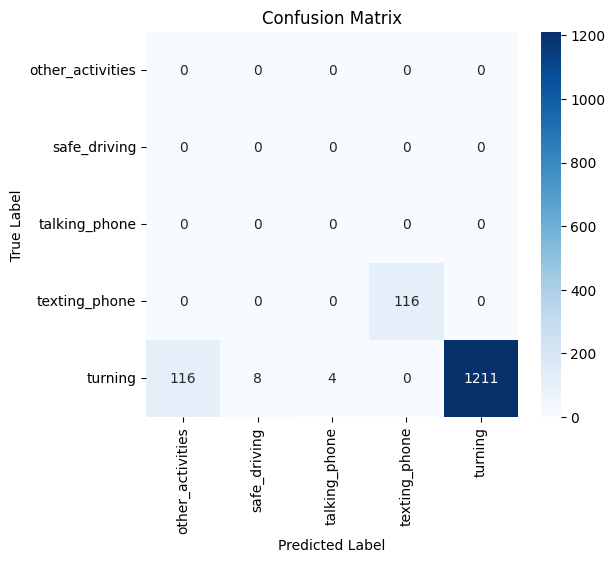

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=class_names,
    yticklabels=class_names
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(
    y_true,
    y_pred,
    target_names=class_names
))


                  precision    recall  f1-score   support

other_activities       0.00      0.00      0.00         0
    safe_driving       0.00      0.00      0.00         0
   talking_phone       0.00      0.00      0.00         0
   texting_phone       1.00      1.00      1.00       116
         turning       1.00      0.90      0.95      1339

        accuracy                           0.91      1455
       macro avg       0.40      0.38      0.39      1455
    weighted avg       1.00      0.91      0.95      1455



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy Curve")
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.show()


NameError: name 'history' is not defined